# Pre-requisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint

In [2]:
countyCode = 'CW'
county = 'Carlow'
sample_size = 5300

# 1. Household Data

## 1.1 Small Area to county mapping

In [4]:
smallAreas = pd.read_csv('Data/Small_Areas_Generalised_20m_-_OSi_National_Statistical_Boundaries_-_2015.csv')

In [6]:
smallAreas.T

,0,1,2,3,4,5,6,7,8,9,...,18631,18632,18633,18634,18635,18636,18637,18638,18639,18640
OBJECTID,1,2,3,4,5,6,7,8,9,10,...,18632,18633,18634,18635,18636,18637,18638,18639,18640,18641
GUID,4c07d11d-f71d-851d-e053-ca3ca8c0ca7f,4c07d11d-f71e-851d-e053-ca3ca8c0ca7f,4c07d11d-f71f-851d-e053-ca3ca8c0ca7f,4c07d11d-f720-851d-e053-ca3ca8c0ca7f,4c07d11d-f564-851d-e053-ca3ca8c0ca7f,4c07d11d-f565-851d-e053-ca3ca8c0ca7f,4c07d11d-f566-851d-e053-ca3ca8c0ca7f,4c07d11d-f567-851d-e053-ca3ca8c0ca7f,4c07d11d-f568-851d-e053-ca3ca8c0ca7f,4c07d11d-f569-851d-e053-ca3ca8c0ca7f,...,4c07d11e-3add-851d-e053-ca3ca8c0ca7f,4c07d11e-3ade-851d-e053-ca3ca8c0ca7f,4c07d11e-3c3b-851d-e053-ca3ca8c0ca7f,4c07d11e-3b89-851d-e053-ca3ca8c0ca7f,4c07d11e-3b8a-851d-e053-ca3ca8c0ca7f,4c07d11e-3b99-851d-e053-ca3ca8c0ca7f,4c07d11e-3b9a-851d-e053-ca3ca8c0ca7f,4c07d11e-3b9b-851d-e053-ca3ca8c0ca7f,4c07d11e-3baa-851d-e053-ca3ca8c0ca7f,4c07d11e-3bab-851d-e053-ca3ca8c0ca7f
NUTS1,IE,IE,IE,IE,IE,IE,IE,IE,IE,IE,...,IE,IE,IE,IE,IE,IE,IE,IE,IE,IE
NUTS1NAME,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,...,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland
NUTS2,IE05,IE05,IE05,IE05,IE04,IE04,IE04,IE04,IE04,IE04,...,IE06,IE06,IE06,IE06,IE06,IE06,IE06,IE06,IE06,IE06
NUTS2NAME,Southern,Southern,Southern,Southern,Northern and Western,Northern and Western,Northern and Western,Northern and Western,Northern and Western,Northern and Western,...,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland,Eastern and Midland
NUTS3,IE053,IE053,IE053,IE053,IE042,IE042,IE042,IE042,IE042,IE042,...,IE061,IE061,IE061,IE061,IE061,IE061,IE061,IE061,IE061,IE061
NUTS3NAME,South-West,South-West,South-West,South-West,West,West,West,West,West,West,...,Dublin,Dublin,Dublin,Dublin,Dublin,Dublin,Dublin,Dublin,Dublin,Dublin
COUNTY,CK,CK,CK,CK,GY,GY,MO,GY,MO,MO,...,FL,FL,DC,DR,DR,DR,DR,DR,FL,FL
COUNTYNAME,Cork County,Cork County,Cork County,Cork County,Galway County,Galway County,Mayo,Galway County,Mayo,Mayo,...,Fingal,Fingal,Dublin City,Dún Laoghaire-Rathdown,Dún Laoghaire-Rathdown,Dún Laoghaire-Rathdown,Dún Laoghaire-Rathdown,Dún Laoghaire-Rathdown,Fingal,Fingal


In [7]:
smallAreas = smallAreas[smallAreas['COUNTY'] == countyCode]

In [8]:
columns = ['OBJECTID', 'GUID', 'COUNTY', 'COUNTYNAME', 'CSOED', 'EDNAME', 'SMALL_AREA', 'GEOGID', 'ESRI_OID']
smallAreas = smallAreas[columns]
#smallAreas

## 1.2 Households in each small area
Proportion based on sample size of population

In [10]:
saps = pd.read_csv('Data/SAPS2016_SA2017.csv')

In [11]:
columns = ['GUID', 'GEOGID', 'T5_1OP_H', 'T5_1MC_H', 'T5_1CC_H', 'T5_1MCC_H', 'T5_1CCC_H', 'T5_1OPFC_H', 'T5_1OPMC_H', 'T5_1CO_H', 'T5_1CCO_H', 'T5_1OPFCO_H', 'T5_1OPMCO_H', 'T5_1GETFU_H', 'T5_1NHR_H', 'T5_1GENP_H', 'T5_1T_H', 'T5_1OP_P', 'T5_1MC_P', 'T5_1CC_P', 'T5_1MCC_P', 'T5_1CCC_P', 'T5_1OPFC_P', 'T5_1OPMC_P', 'T5_1CO_P', 'T5_1CCO_P', 'T5_1OPFCO_P', 'T5_1OPMCO_P', 'T5_1GETFU_P', 'T5_1NHR_P', 'T5_1GENP_P', 'T5_1T_P']

In [12]:
households = saps[columns]

In [13]:
households['OnePerson'] = households['T5_1OP_H']
households['Couple'] = households['T5_1MC_H'] + households['T5_1CC_H'] + households['T5_1CO_H']
households['CoupleWithChildren'] = households['T5_1MCC_H'] + households['T5_1CCC_H'] + households['T5_1CCO_H']
households['OneParentFamily'] = households['T5_1OPFC_H'] + households['T5_1OPMC_H'] + households['T5_1OPFCO_H'] + households['T5_1OPMCO_H']
households['NonRelated'] = households['T5_1NHR_H'] + households['T5_1GENP_H']

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [14]:
households = households[['GUID', 'GEOGID', 'OnePerson', 'Couple', 'CoupleWithChildren', 'OneParentFamily', 'NonRelated']]

In [15]:
# join onto small areas and filter by county
households = households.merge(smallAreas, how='inner', left_on='GUID', right_on='GUID')

In [16]:
countyHouseholds = households[households['COUNTYNAME'] == county]

## 1.3 Calculate sample of households

In [18]:
# Get CSO data on age distribution
ageProfile = pd.read_excel('Data/Census2016_Age_Distribution_ByCounty.xlsx', sheet_name='E2022.20211008T221047')
ageProfile.columns = ageProfile.columns.str.replace(' ', '_')

In [19]:
# Aggregate upto county level to get totals
countyTotals = ageProfile.groupby(['County_and_City'], as_index=False).agg({'VALUE' : 'sum'}).sort_values(by='VALUE', ascending=False)

# Then calculate proportion based on sample size
sample_proportion = sample_size / countyTotals[countyTotals['County_and_City'] == county]['VALUE']

In [20]:
countyHouseholds['OnePerson_sample'] = countyHouseholds['OnePerson'].apply(lambda x: x * sample_proportion)
countyHouseholds['Couple_sample'] = countyHouseholds['Couple'].apply(lambda x: x * sample_proportion)
countyHouseholds['CoupleWithChildren_sample'] = countyHouseholds['CoupleWithChildren'].apply(lambda x: x * sample_proportion)
countyHouseholds['OneParentFamily_sample'] = countyHouseholds['OneParentFamily'].apply(lambda x: x * sample_proportion)
countyHouseholds['NonRelated_sample'] = countyHouseholds['NonRelated'].apply(lambda x: x * sample_proportion)

In [21]:
countyHouseholds['OnePerson_sample'] = countyHouseholds['OnePerson_sample'].round(0)
countyHouseholds['Couple_sample'] = countyHouseholds['Couple_sample'].round(0)
countyHouseholds['CoupleWithChildren_sample'] = countyHouseholds['CoupleWithChildren_sample'].round(0)
countyHouseholds['OneParentFamily_sample'] = countyHouseholds['OneParentFamily_sample'].round(0)
countyHouseholds['NonRelated_sample'] = countyHouseholds['NonRelated_sample'].round(0)

In [22]:
# Only keep sample columns
columns = ['GUID', 'SMALL_AREA', 'COUNTY', 'COUNTYNAME', 'EDNAME', 'OnePerson_sample', 'Couple_sample', 'CoupleWithChildren_sample',   'OneParentFamily_sample', 'NonRelated_sample']
countyHouseholds = countyHouseholds[columns]

In [23]:
countyHouseholds = countyHouseholds.melt(id_vars=['GUID', 'SMALL_AREA', 'COUNTY', 'COUNTYNAME', 'EDNAME'], var_name='HouseType', value_name='Households')

In [24]:
countyHouseholds['Households'] = countyHouseholds['Households'].astype(int)

## 1.4 Create sample households

In [25]:
sampleHouseholds = []
for index, row in countyHouseholds.iterrows():
    for house in range(0, row['Households']):
        sampleHouseholds.append([row['GUID'], row['SMALL_AREA'], row['COUNTY'], row['COUNTYNAME'], row['EDNAME'], row['HouseType'], row['SMALL_AREA'] + str(house)])

In [26]:
sampleHouseholds = pd.DataFrame(sampleHouseholds, columns=['GUID', 'SMALL_AREA', 'COUNTY', 'COUNTYNAME', 'EDNAME', 'HOUSETYPE', 'FAMILYID'])

# 2. Create sample population at small area level

In [27]:
columns = ['GUID', 'GEOGID', 'T1_1AGE0M', 'T1_1AGE1M', 'T1_1AGE2M', 'T1_1AGE3M', 'T1_1AGE4M', 'T1_1AGE5M', 'T1_1AGE6M', 'T1_1AGE7M', 'T1_1AGE8M', 'T1_1AGE9M', 'T1_1AGE10M', 'T1_1AGE11M', 'T1_1AGE12M', 'T1_1AGE13M', 'T1_1AGE14M', 'T1_1AGE15M', 'T1_1AGE16M', 'T1_1AGE17M', 'T1_1AGE18M', 'T1_1AGE19M', 'T1_1AGE20_24M', 'T1_1AGE25_29M', 'T1_1AGE30_34M', 'T1_1AGE35_39M', 'T1_1AGE40_44M', 'T1_1AGE45_49M', 'T1_1AGE50_54M', 'T1_1AGE55_59M', 'T1_1AGE60_64M', 'T1_1AGE65_69M', 'T1_1AGE70_74M', 'T1_1AGE75_79M', 'T1_1AGE80_84M', 'T1_1AGEGE_85M', 'T1_1AGE0F', 'T1_1AGE1F', 'T1_1AGE2F', 'T1_1AGE3F', 'T1_1AGE4F', 'T1_1AGE5F', 'T1_1AGE6F', 'T1_1AGE7F', 'T1_1AGE8F', 'T1_1AGE9F', 'T1_1AGE10F', 'T1_1AGE11F', 'T1_1AGE12F', 'T1_1AGE13F', 'T1_1AGE14F', 'T1_1AGE15F', 'T1_1AGE16F', 'T1_1AGE17F', 'T1_1AGE18F', 'T1_1AGE19F', 'T1_1AGE20_24F', 'T1_1AGE25_29F', 'T1_1AGE30_34F', 'T1_1AGE35_39F', 'T1_1AGE40_44F', 'T1_1AGE45_49F', 'T1_1AGE50_54F', 'T1_1AGE55_59F', 'T1_1AGE60_64F', 'T1_1AGE65_69F', 'T1_1AGE70_74F', 'T1_1AGE75_79F', 'T1_1AGE80_84F', 'T1_1AGEGE_85F']
smallareaPop = saps.loc[saps['GUID'].isin(sampleHouseholds['GUID'].unique()), columns]

In [28]:
smallareaPop = smallareaPop.melt(id_vars=['GUID', 'GEOGID'], var_name='AgeBracket', value_name='Volume')

In [29]:
sample = []
for index, row in smallareaPop.iterrows():
    for person in range(0, row['Volume']):
        # add a row (agent) to the list with GUID, Small area, age bracket
        sample.append([row['GUID'], row['GEOGID'], row['AgeBracket']])

## 2.1 Build sample population

In [25]:
samplePopulation = pd.DataFrame(sample, columns=['GUID', 'GEOGID', 'AgeBracket'])

In [26]:
# Take the last letter and use as gender - M or F
samplePopulation['gender'] = samplePopulation['AgeBracket'].str[-1]

In [27]:
# Strip out the min and max ages from the age brackets
samplePopulation['AgeBracketStripped'] = samplePopulation['AgeBracket'].str[7:]
samplePopulation['AgeBracketStripped'] = samplePopulation['AgeBracketStripped'].str[:-1]

In [28]:
# get upper and lower bounds of age based on age bracket
samplePopulation['ageHigh'] = np.where(samplePopulation['AgeBracketStripped'].str.contains('_'), samplePopulation['AgeBracketStripped'].str[-2:], samplePopulation['AgeBracketStripped'])
samplePopulation['ageLow'] = np.where(samplePopulation['AgeBracketStripped'].str.contains('_'), samplePopulation['AgeBracketStripped'].str[:2], samplePopulation['AgeBracketStripped'])

# tidy up
samplePopulation['ageLow'] = np.where(samplePopulation['ageLow'] == 'GE', 85, samplePopulation['ageLow'])
samplePopulation['ageHigh'] = np.where(samplePopulation['ageHigh'] == '85', 95, samplePopulation['ageHigh'])

# Type conversion
samplePopulation['ageLow'] = samplePopulation['ageLow'].astype(int)
samplePopulation['ageHigh'] = samplePopulation['ageHigh'].astype(int)

# Generate ages based on low and high values (random between the two)
samplePopulation['age'] = samplePopulation.apply(lambda row: randint(row['ageLow'], row['ageHigh']), axis=1)

### 2.2 Add Economic Status

### 2.2.1 Get Economic status data

In [29]:
carlowPop = ageProfile[ageProfile['County_and_City'] == county]

In [30]:
principal_economic_status = pd.read_excel('Census 2016 Population aged 15 years and over by principal economic status and sex.xlsx', sheet_name='Sheet1')
principal_economic_status = principal_economic_status[principal_economic_status['Principal Economic Status'] != 'Total']

In [31]:
principal_economic_status = principal_economic_status.groupby(['Group', 'Group_Name'], as_index=False).agg({'Male' : 'sum', 'Female' : 'sum'})

In [32]:
# Get Total number of potential students (15 to 24 year olds)
male15to24Tot = carlowPop.loc[(carlowPop['Age_Group'].isin(['15 - 19 years', '20 - 24 years'])) & (carlowPop['Sex'] == 'Male'), ['VALUE']].sum()
female15to24Tot = carlowPop.loc[(carlowPop['Age_Group'].isin(['15 - 19 years', '20 - 24 years'])) & (carlowPop['Sex'] == 'Female'), ['VALUE']].sum()

# Get aggregate student numbers
maleStudent = principal_economic_status[principal_economic_status['Group'] == 'S']['Male']
femaleStudent = principal_economic_status[principal_economic_status['Group'] == 'S']['Female']

In [33]:
# male15to24 and female15to24 are series so taking the first value
# These are the probabilities that a person aged between 15 and 24 are students
male_student_prob = maleStudent / male15to24Tot[0]
female_student_prob = femaleStudent / female15to24Tot[0]

In [34]:
# Probability of being at work
P_atwork_male = principal_economic_status[principal_economic_status['Group'] == 'W']['Male'] / principal_economic_status[principal_economic_status['Group'].isin(['W', 'U'])]['Male'].sum()
P_atwork_female = principal_economic_status[principal_economic_status['Group'] == 'W']['Female'] / principal_economic_status[principal_economic_status['Group'].isin(['W', 'U'])]['Female'].sum()

# Probability of being unemployed
P_unemployed_male = 1 - P_atwork_male
P_unemployed_female = 1 - P_atwork_female

In [35]:
# convert to single values
P_atwork_male.reset_index(inplace=True, drop=True)
P_atwork_male = P_atwork_male[0]

P_atwork_female.reset_index(inplace=True, drop=True)
P_atwork_female = P_atwork_female[0]

male_student_prob.reset_index(inplace=True, drop=True)
male_student_prob = male_student_prob[0]

female_student_prob.reset_index(inplace=True, drop=True)
female_student_prob = female_student_prob[0]

### 2.2.2 Apply to sample population

In [36]:
def flip(p, heads='At_work', tails='Unemployed'):
    return heads if random.random() <= p else tails

In [37]:
samplePopulation['EconomicStatus'] = np.nan
# Students up to 15
samplePopulation['EconomicStatus'] = np.where(samplePopulation['age'] <= 5, 'Preschool', np.where(samplePopulation['age'] <= 15, 'Student', samplePopulation['EconomicStatus']))

# Retired = anyone >= 65
samplePopulation['EconomicStatus'] = np.where(samplePopulation['age'] >= 65, 'Retired', samplePopulation['EconomicStatus'])

In [38]:
# apply status depending on probabilities above

# Students
samplePopulation.loc[(samplePopulation['age'] > 15) & (samplePopulation['age'] <= 24) & (samplePopulation['gender'] == 'M'), ['EconomicStatus']] = samplePopulation.loc[(samplePopulation['age'] > 15) & (samplePopulation['age'] <= 24) & (samplePopulation['gender'] == 'M'), ['EconomicStatus']].apply(lambda row: flip(male_student_prob, heads='Student', tails='At_work'), axis=1)
samplePopulation.loc[(samplePopulation['age'] > 15) & (samplePopulation['age'] <= 24) & (samplePopulation['gender'] == 'F'), ['EconomicStatus']] = samplePopulation.loc[(samplePopulation['age'] > 15) & (samplePopulation['age'] <= 24) & (samplePopulation['gender'] == 'F'), ['EconomicStatus']].apply(lambda row: flip(female_student_prob, heads='Student', tails='At_work'), axis=1)


# Over 25's (i.e. not students)
samplePopulation.loc[(samplePopulation['age'] > 24) & (samplePopulation['age'] < 65) & (samplePopulation['gender'] == 'M'), ['EconomicStatus']] = samplePopulation.loc[(samplePopulation['age'] > 24) & (samplePopulation['age'] < 65) & (samplePopulation['gender'] == 'M'), ['EconomicStatus']].apply(lambda row: flip(P_atwork_male), axis=1)
samplePopulation.loc[(samplePopulation['age'] > 24) & (samplePopulation['age'] < 65) & (samplePopulation['gender'] == 'F'), ['EconomicStatus']] = samplePopulation.loc[(samplePopulation['age'] > 24) & (samplePopulation['age'] < 65) & (samplePopulation['gender'] == 'F'), ['EconomicStatus']].apply(lambda row: flip(P_atwork_female), axis=1)

In [39]:
# set 20% of workers with isEssential = True
essentialWorkerProbability = 0.2
samplePopulation['isEssential'] = samplePopulation.loc[samplePopulation['EconomicStatus'] == 'At_work'].apply(lambda row: flip(p=essentialWorkerProbability, heads=True, tails=False), axis=1)

In [40]:
# drop un-needed columns
samplePopulation = samplePopulation[['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential']]

# use the index as an if column
samplePopulation['personid'] = samplePopulation.index

In [41]:
# add familyid
samplePopulation['familyid'] = None

## 3. Add people to households

In [42]:
def getPerson(ageLow, ageHigh, familyid, gender=None):
    # keep pulling a sample until one comes within correct age bracket and gender.
    # sample must also not be already assigned to a family
    samplegood = False
    while samplegood == False:
        sample = samplePopulation.sample(n=1, axis=0)
        #print(sample)
        samplegood = True
        if gender != None:
            if sample['gender'].item() != gender:
                samplegood = False
                #print('failed on gender')
        if (sample['age'].item() < ageLow) | (sample['age'].item() > ageHigh):
            samplegood = False
        if pd.notnull(sample['familyid'].item()):
            samplegood = False
            #print('failed on familyid')
    
    # return good sample
    return sample
        

### 3.6.1 Populate one person households

In [43]:
familyList = []
for index, row in sampleHouseholds[sampleHouseholds['HOUSETYPE'] == 'OnePerson_sample'].iterrows():
    person = getPerson(ageLow=18, ageHigh=95, familyid=row['FAMILYID'])
    #print(person)
    person['familyid'] = row['FAMILYID']
    familyList.append([person['GUID'].item(), person['GEOGID'].item(), person['gender'].item(), person['age'].item(), person['EconomicStatus'].item(), person['isEssential'].item(), person['personid'].item(), person['familyid'].item()])

In [44]:
familyList = pd.DataFrame(familyList, columns = ['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential', 'personid', 'familyid'])

### 3.6.2 Populate couple households

In [45]:
tempList = []
for index, row in sampleHouseholds[sampleHouseholds['HOUSETYPE'] == 'Couple_sample'].iterrows():
    person = getPerson(ageLow=18, ageHigh=95, familyid=row['FAMILYID'])
    # ensure second person is within 10 years of age and opposite gender (make assumption)
    minAge = max(18, person['age'].item() - 10)
    maxAge = person['age'].item() + 10
    gender = 'M' if person['gender'].item() == 'F' else 'F' # toggle male/female
    person2 = getPerson(ageLow=minAge, ageHigh=maxAge, familyid=row['FAMILYID'], gender=gender)
    tempList.append([person['GUID'].item(), person['GEOGID'].item(), person['gender'].item(), person['age'].item(), person['EconomicStatus'].item(), person['isEssential'].item(), person['personid'].item(), row['FAMILYID']])
    tempList.append([person2['GUID'].item(), person2['GEOGID'].item(), person2['gender'].item(), person2['age'].item(), person2['EconomicStatus'].item(), person2['isEssential'].item(), person2['personid'].item(), row['FAMILYID']])

In [46]:
tempList = pd.DataFrame(tempList, columns=['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential', 'personid', 'familyid'])

In [47]:
# append on to main familyList
familyList = familyList.append(tempList)

### 3.6.3 Populate Couples with children

In [48]:
tempList = []
for index, row in sampleHouseholds[sampleHouseholds['HOUSETYPE'] == 'CoupleWithChildren_sample'].iterrows():
    parent1 = getPerson(ageLow=18, ageHigh=50, familyid=row['FAMILYID'])
    # ensure second parent is within 10 years of age and opposite gender (make assumption)
    minAge = max(18, parent1['age'].item() - 10)
    maxAge = parent1['age'].item() + 10
    gender = 'M' if parent1['gender'].item() == 'F' else 'F' # toggle male/female
    parent2 = getPerson(ageLow=minAge, ageHigh=maxAge, familyid=row['FAMILYID'], gender=gender)
    child1 = getPerson(ageLow=0, ageHigh=17, familyid=row['FAMILYID'])
    child2 = getPerson(ageLow=0, ageHigh=17, familyid=row['FAMILYID'])
    tempList.append([parent1['GUID'].item(), parent1['GEOGID'].item(), parent1['gender'].item(), parent1['age'].item(), parent1['EconomicStatus'].item(), parent1['isEssential'].item(), parent1['personid'].item(), row['FAMILYID']])
    tempList.append([parent2['GUID'].item(), parent2['GEOGID'].item(), parent2['gender'].item(), parent2['age'].item(), parent2['EconomicStatus'].item(), parent2['isEssential'].item(), parent2['personid'].item(), row['FAMILYID']])
    tempList.append([child1['GUID'].item(), child1['GEOGID'].item(), child1['gender'].item(), child1['age'].item(), child1['EconomicStatus'].item(), child1['isEssential'].item(), child1['personid'].item(), row['FAMILYID']])
    tempList.append([child2['GUID'].item(), child2['GEOGID'].item(), child2['gender'].item(), child2['age'].item(), child2['EconomicStatus'].item(), child2['isEssential'].item(), child2['personid'].item(), row['FAMILYID']])
    

In [49]:
tempList = pd.DataFrame(tempList, columns=['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential', 'personid', 'familyid'])

In [50]:
# append on to main familyList
familyList = familyList.append(tempList)

### 3.6.4 Populate one parent family

In [51]:
tempList = []
for index, row in sampleHouseholds[sampleHouseholds['HOUSETYPE'] == 'OneParentFamily_sample'].iterrows():
    parent1 = getPerson(ageLow=18, ageHigh=50, familyid=row['FAMILYID'])
    child1 = getPerson(ageLow=0, ageHigh=17, familyid=row['FAMILYID'])
    #child2 = getPerson(ageLow=0, ageHigh=17, familyid=row['FAMILYID'])
    tempList.append([parent1['GUID'].item(), parent1['GEOGID'].item(), parent1['gender'].item(), parent1['age'].item(), parent1['EconomicStatus'].item(), parent1['isEssential'].item(), parent1['personid'].item(), row['FAMILYID']])
    tempList.append([child1['GUID'].item(), child1['GEOGID'].item(), child1['gender'].item(), child1['age'].item(), child1['EconomicStatus'].item(), child1['isEssential'].item(), child1['personid'].item(), row['FAMILYID']])
    #tempList.append([child2['GUID'].item(), child2['GEOGID'].item(), child2['gender'].item(), child2['age'].item(), child2['EconomicStatus'].item(), child2['isEssential'].item(), child2['personid'].item(), row['FAMILYID']])
    

In [52]:
tempList = pd.DataFrame(tempList, columns=['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential', 'personid', 'familyid'])

In [53]:
# append on to main familyList
familyList = familyList.append(tempList)

### 3.6.5 Populate non related households

In [54]:
tempList = []
for index, row in sampleHouseholds[sampleHouseholds['HOUSETYPE'] == 'NonRelated_sample'].iterrows():
    person = getPerson(ageLow=18, ageHigh=95, familyid=row['FAMILYID'])
    person2 = getPerson(ageLow=18, ageHigh=95, familyid=row['FAMILYID'])
    person3 = getPerson(ageLow=18, ageHigh=95, familyid=row['FAMILYID'])
    tempList.append([person['GUID'].item(), person['GEOGID'].item(), person['gender'].item(), person['age'].item(), person['EconomicStatus'].item(), person['isEssential'].item(), person['personid'].item(), row['FAMILYID']])
    tempList.append([person2['GUID'].item(), person2['GEOGID'].item(), person2['gender'].item(), person2['age'].item(), person2['EconomicStatus'].item(), person2['isEssential'].item(), person2['personid'].item(), row['FAMILYID']])
    tempList.append([person3['GUID'].item(), person3['GEOGID'].item(), person3['gender'].item(), person3['age'].item(), person3['EconomicStatus'].item(), person3['isEssential'].item(), person3['personid'].item(), row['FAMILYID']])


In [55]:
tempList = pd.DataFrame(tempList, columns=['GUID', 'GEOGID', 'gender', 'age', 'EconomicStatus', 'isEssential', 'personid', 'familyid'])

In [56]:
# append on to main familyList
familyList = familyList.append(tempList)

In [57]:
familyList['personid'] = familyList.index

In [58]:
familyList.head()

,GUID,GEOGID,gender,age,EconomicStatus,isEssential,personid,familyid
0,4c07d11d-f755-851d-e053-ca3ca8c0ca7f,SA2017_017046001,F,68,Retired,NaN,0,170010010
1,4c07d11d-f75a-851d-e053-ca3ca8c0ca7f,SA2017_017014002,M,46,At_work,False,1,170010011
2,4c07d11d-f70c-851d-e053-ca3ca8c0ca7f,SA2017_017012002/017012003,F,72,Retired,NaN,2,170020010
3,4c07d11e-1d81-851d-e053-ca3ca8c0ca7f,SA2017_017010013,F,59,At_work,False,3,170020011
4,4c07d11e-2e32-851d-e053-ca3ca8c0ca7f,SA2017_017010045,M,26,At_work,True,4,170020020


In [59]:
import csv

### 3.6.6 Export to flat files

In [60]:
#familyList.to_csv('agents.txt', sep='\t', index=False, header=False, quoting=csv.QUOTE_NONNUMERIC)

In [61]:
#sampleHouseholds.to_csv('households.txt', sep='\t', index=False, header=False, quoting=csv.QUOTE_NONNUMERIC)

In [62]:
#small_areas = pd.DataFrame(sampleHouseholds['SMALL_AREA'].sort_values().unique())

In [63]:
#small_areas.to_csv('small_areas.txt', sep='\t', index=False, header=False, quoting=csv.QUOTE_NONNUMERIC)

<AxesSubplot:>

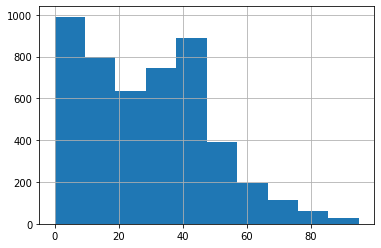

In [64]:
familyList['age'].hist()

## Validate sample data using population level data

In [65]:
from scipy.stats import ttest_ind

In [82]:
a = familyList['age']

In [83]:
b = samplePopulation['age']

In [87]:
ttest_ind(a, b, axis=0, equal_var=False)

Ttest_indResult(statistic=-25.42310360687449, pvalue=1.60036344546587e-135)

<AxesSubplot:>

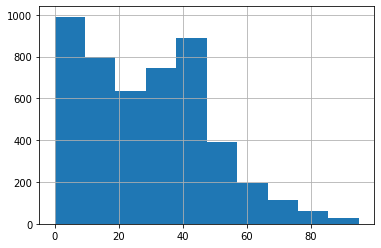

In [85]:
a.hist()

<AxesSubplot:>

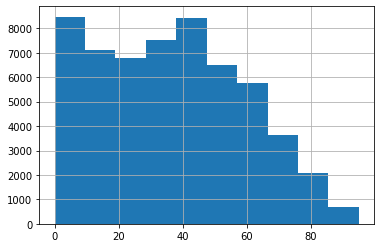

In [86]:
b.hist()

In [69]:
samplePopulation

,GUID,GEOGID,gender,age,EconomicStatus,isEssential,personid,familyid
0,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,M,0,Preschool,NaN,0,None
1,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,M,0,Preschool,NaN,1,None
2,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,M,0,Preschool,NaN,2,None
3,4c07d11e-11d3-851d-e053-ca3ca8c0ca7f,SA2017_017001001,M,0,Preschool,NaN,3,None
4,4c07d11e-123a-851d-e053-ca3ca8c0ca7f,SA2017_017002001,M,0,Preschool,NaN,4,None
...,...,...,...,...,...,...,...,...
56927,4c07d11e-1d1f-851d-e053-ca3ca8c0ca7f,SA2017_017054006,F,95,Retired,NaN,56927,None
56928,4c07d11e-1d1f-851d-e053-ca3ca8c0ca7f,SA2017_017054006,F,90,Retired,NaN,56928,None
56929,4c07d11e-1d1f-851d-e053-ca3ca8c0ca7f,SA2017_017054006,F,94,Retired,NaN,56929,None
56930,4c07d11e-1d1f-851d-e053-ca3ca8c0ca7f,SA2017_017054006,F,92,Retired,NaN,56930,None


<AxesSubplot:>

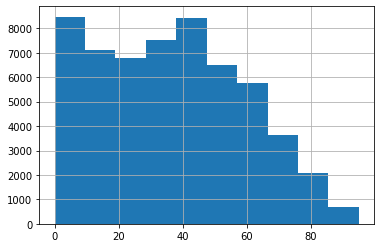

In [70]:
samplePopulation['age'].hist()